# Overview of the project:

This project mainly develops a typical machine learning model to identify whether a person has heart disease or not.
All the information regarding code snippets and features with accurate results are mentioned below.

## Tools and packages required:

we will use numpy,matplotlib,pandas,seaborn,scikit-learn,pandas to develop machine learning model

In [26]:
# importing numpy,pandas,matplotlib,seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [8]:
# The below shows plots inside our notebook
%matplotlib inline


In [31]:
#importing all the important libraries from scikit learn 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score


## Import or load data

In [32]:
#importing heart disease csv file
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Let's perform EDA(Exploratory data analysis)

In [17]:
#Lets check for missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
heart_disease.shape

(303, 14)

## Finding patterns based on target and sex

In [10]:
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

## Plotting graph to check patterns for target attribute and sex attribute

In [27]:
pd.crosstab(heart_disease['target'], heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [17]:
## plotting bar graph for more clear visual representation

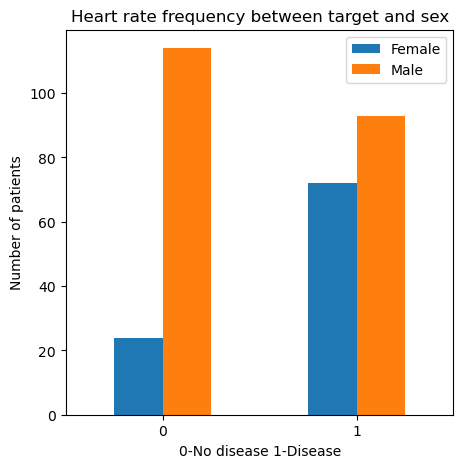

In [6]:
pd.crosstab(heart_disease['target'], heart_disease['sex']).plot(kind='bar', figsize=(5,5));
plt.title("Heart rate frequency between target and sex");
plt.xlabel("0-No disease 1-Disease");
plt.ylabel("Number of patients");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

## comparing other features with target variable

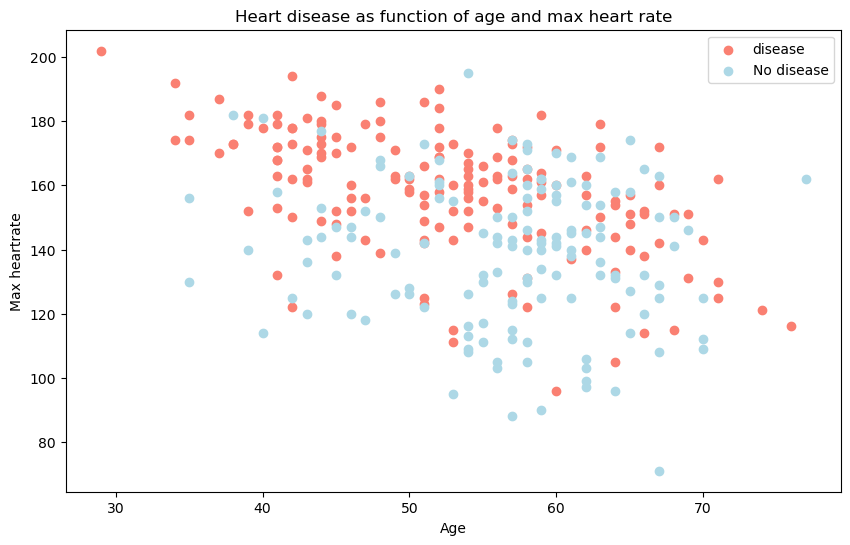

In [7]:
## Create another figure
plt.figure(figsize=(10,6))
## scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target==1], heart_disease.thalach[heart_disease.target==1], c="salmon");
## scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0], heart_disease.thalach[heart_disease.target==0], c="lightblue");
## some information
plt.title("Heart disease as function of age and max heart rate")
plt.xlabel("Age");
plt.ylabel("Max heartrate");
plt.xticks(rotation=0);
plt.legend(["disease","No disease"]);


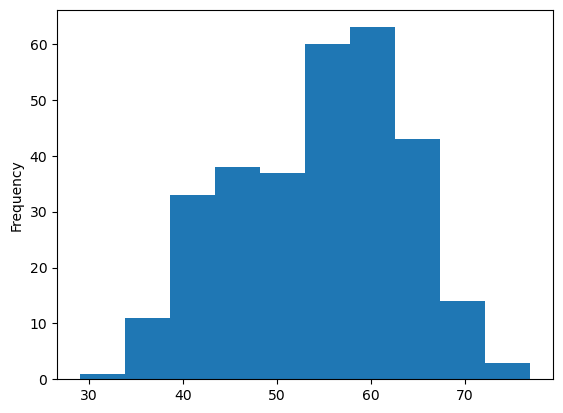

In [8]:
## checking for outliers with help of histogram
heart_disease.age.plot(kind="hist");

## Heart disease frequency based on chest pain 

In [40]:
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


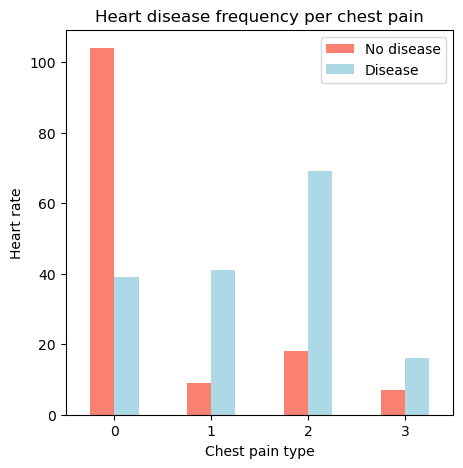

In [9]:
## let's make it more visual
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind="bar", figsize=(5,5), color=["salmon", "lightblue"]);
plt.legend(["No disease", "Disease"]);
plt.title("Heart disease frequency per chest pain");
plt.xlabel("Chest pain type");
plt.ylabel("Heart rate");
plt.xticks(rotation=0);

## Checking correlation matrix

In [44]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


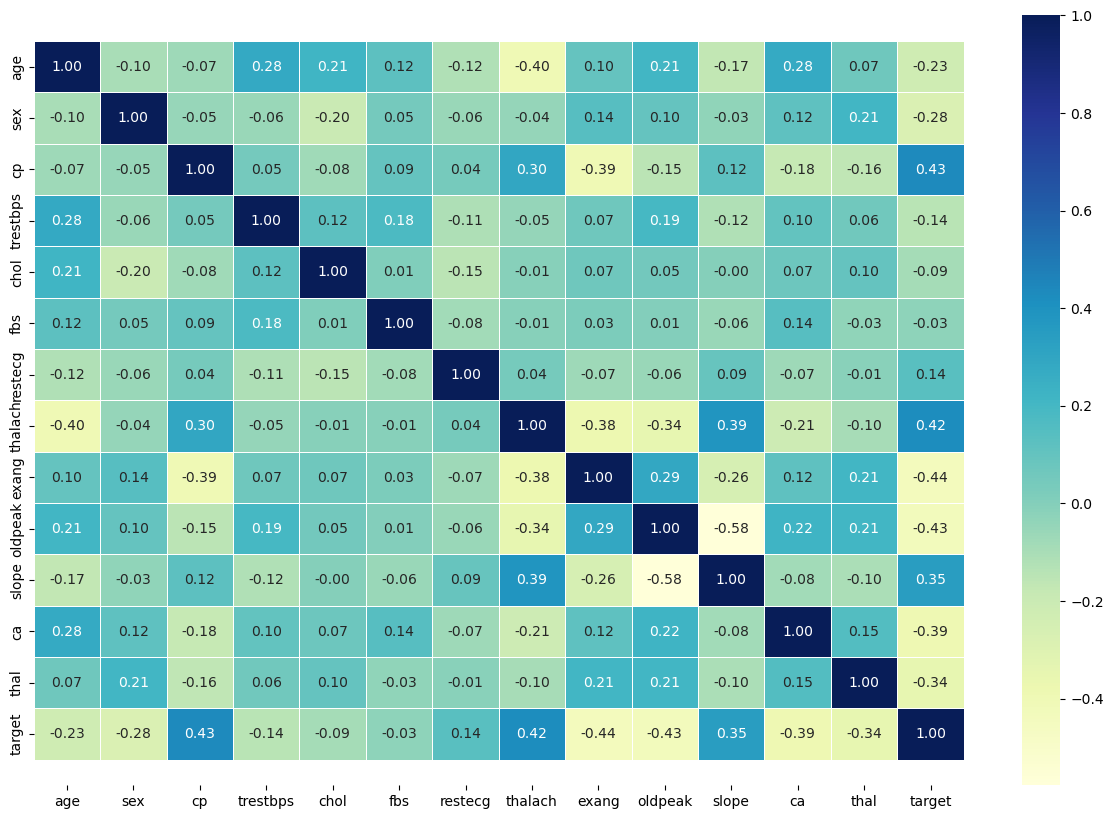

In [10]:
## To make correlation matrix more visible we use seaborn heatmap
corr_dis=heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,10));
ax=sns.heatmap(corr_dis,annot=True,linewidths=0.5, fmt=".2f", cmap="YlGnBu");
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5, top-0.5);

## Modeling 

In [53]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# Let's split our data into independent and dependent variables
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

In [13]:
## Let's split our data into training set and test set
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2);

Now we are going to find right model for our data:
1. Logistic Regression
2. K-nearest neighbours classifier 
3. Random Forest Classifier


In [33]:
# Let's put models in our dictionary
models={"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),"Random Forest": RandomForestClassifier()}
# creating a function to fit and score using models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    # Set up random seed
    np.random.seed(42)
    # Make a dictionary to keep individual scores
    model_scores={}
    # Looping through models
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)

    return model_scores

In [34]:
model_scores= fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\User\Desktop\MLprojects\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparison

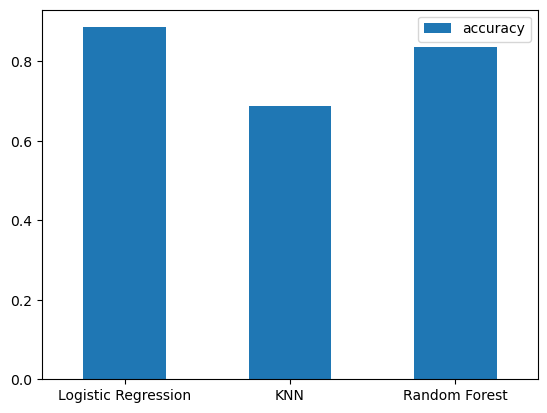

In [21]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar");
plt.xticks(rotation=0);

## Hyperparameter tuning

In [35]:
# Let's tune KNN by hand
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [23]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [24]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.409836%


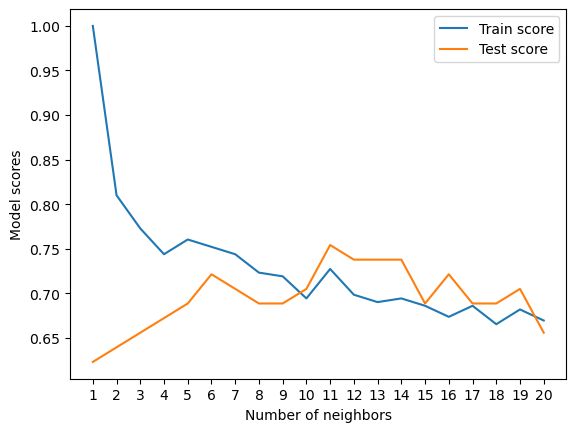

In [28]:
## let's visualize it
plt.plot(neighbors,train_scores, label="Train score")
plt.plot(neighbors,test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:2f}%")

## Hyperparameter tuning using RandomizedSearchCV

In [36]:
## creating grid for logistic regression
log_reg_grid={"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
## creating grid for random forest classifier
rf_grid={"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3,5,10], "min_samples_split": np.arange(2,20,2), "min_samples_leaf":np.arange(1,20,2)}


In [37]:
## tuning logistic regression using randomized search cv
np.random.seed(42)
rs_log_reg= RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [39]:
## tuning RandomForestClassifier using randomized search cv
np.random.seed(42)
rs_rf= RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [40]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

In [41]:
np.random.seed(42)
gs_log_reg= GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

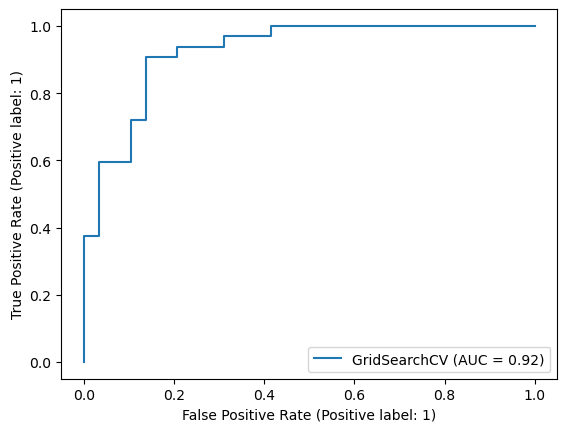

In [44]:
## plot ROC curve and calculate AUC metric
y_preds=gs_log_reg.predict(X_test)
roc_curve_display=RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

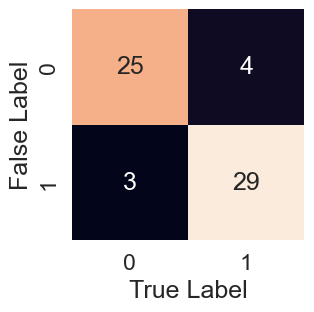

In [45]:
## plotting confusion matrix
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds), annot=True ,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("False Label")
    
plot_conf_matrix(y_test,y_preds)
    

In [46]:
## Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [47]:
## Calculating evaluation metrics using Cross Validation
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
## Creating a new classifier for LogisticRegression
clf=LogisticRegression(C= 0.23357214690901212, solver='liblinear')

In [54]:
## Cross-validated accuracy
cv_accur=cross_val_score(clf,X,y,cv=5, scoring="accuracy")
cv_accur=np.mean(cv_accur)
cv_accur

0.8479781420765027

In [53]:
## Cross-validated accuracy
cv_prec=cross_val_score(clf,X,y,cv=5, scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

0.8215873015873015

In [55]:
## Cross-validated recall
cv_recall=cross_val_score(clf,X,y,cv=5, scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [56]:
## Cross-validated f1-score
cv_f1=cross_val_score(clf,X,y,cv=5, scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

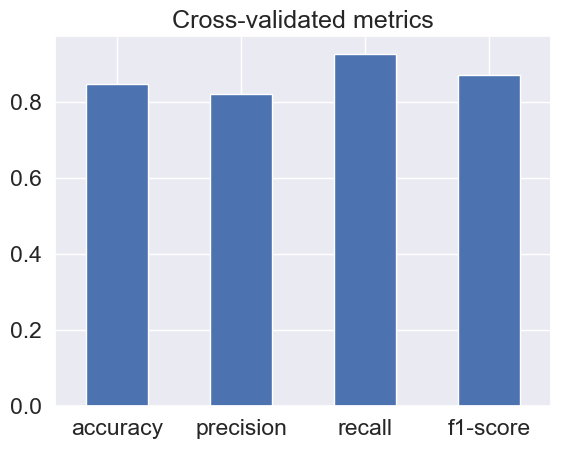

In [59]:
## Visualizing all cross-validated metrics
cv_metrics=pd.DataFrame({"accuracy": cv_accur, "precision": cv_prec, "recall": cv_recall, "f1-score": cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-validated metrics", legend=False);
plt.xticks(rotation=0);

In [60]:
## Let's check feature importance
## Fit an instance of LogisticRegression
clf=LogisticRegression(C= 0.23357214690901212, solver='liblinear')
clf.fit(X_train, y_train);

In [61]:
## check coef
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490194,  0.02472938, -0.63120405, -0.57590939,
         0.47095134, -0.65165349, -0.69984206]])

In [62]:
# Matching coef's of features to columns
dict_feature=dict(zip(heart_disease.columns, list(clf.coef_[0])))
dict_feature

{'age': 0.003699220218693,
 'sex': -0.9042408909021112,
 'cp': 0.6747282639169492,
 'trestbps': -0.01161340193177967,
 'chol': -0.001703644306964925,
 'fbs': 0.047876883381437196,
 'restecg': 0.33490194499930287,
 'thalach': 0.024729383642503815,
 'exang': -0.6312040482089574,
 'oldpeak': -0.5759093926828687,
 'slope': 0.470951337854335,
 'ca': -0.651653485595126,
 'thal': -0.6998420593767237}

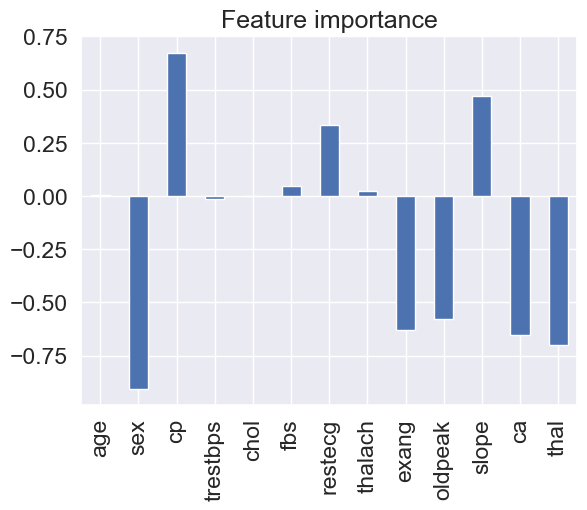

In [64]:
## Visualizing feature importance
feature_df=pd.DataFrame(dict_feature, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);